# **fiona haria 60009220048 d1-1 d040**

# **Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
!pip install kaggle

# **Installing Dataset**

In [3]:
!kaggle datasets download -d paultimothymooney/blood-cells

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/blood-cells
License(s): other
 94% 102M/108M [00:02<00:00, 31.9MB/s]
100% 108M/108M [00:02<00:00, 53.2MB/s]


In [4]:
!unzip blood-cells.zip -d blood_cells_dataset

Streaming output truncated to the last 5000 lines.
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: 

In [5]:
train_dir = 'blood_cells_dataset/dataset2-master/dataset2-master/images/TRAIN'
test_dir = 'blood_cells_dataset/dataset2-master/dataset2-master/images/TEST'

# **Dividing into training and testing datasets**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess validation images
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load and preprocess testing images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


# **Model Building**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes in the blood cell dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.2438 - loss: 1.3891 - val_accuracy: 0.2509 - val_loss: 1.3864
Epoch 2/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.2346 - loss: 1.3866 - val_accuracy: 0.2509 - val_loss: 1.3863
Epoch 3/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.2449 - loss: 1.3868 - val_accuracy: 0.2509 - val_loss: 1.3863
Epoch 4/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.2413 - loss: 1.3868 - val_accuracy: 0.2494 - val_loss: 1.3864
Epoch 5/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.2434 - loss: 1.3868 - val_accuracy: 0.2524 - val_loss: 1.3863
Epoch 6/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.2428 - loss: 1.3865 - val_accuracy: 0.2509 - val_loss: 1.3863
Epoch 7/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.2522 - loss: 1.3864 - val_accuracy: 0.2509 - val_loss: 1.3864
Epoch 8/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.2459 - loss: 1.3863 - val_accuracy:

# **Accuracy and Loss Graph**

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2464 - loss: 1.3863
Test accuracy: 0.2505


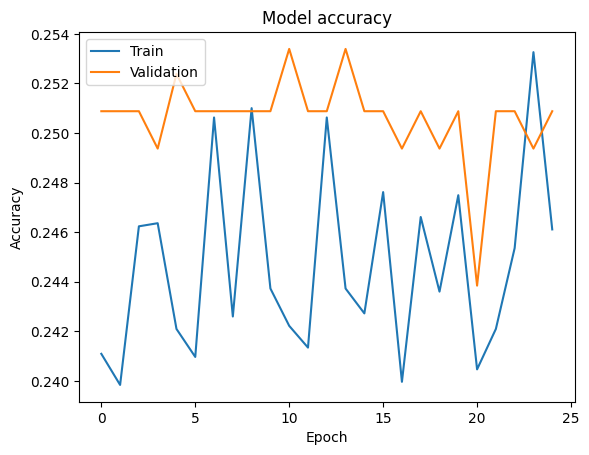

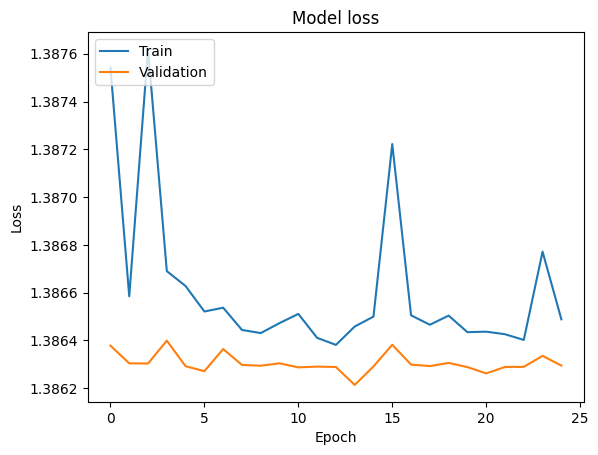

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [10]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(hp):
    model = Sequential()

    for i in range(hp.Int('conv_layers', 2, 4)):
        model.add(Conv2D(filters=hp.Choice(f'filters_{i}', [32, 64, 128]),
                         kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(4, activation='softmax'))

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='blood_cells'
)

tuner.search_space_summary()

tuner.search(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

print(f"Best Hyperparameters: {best_hps.values}")


Trial 5 Complete [00h 01m 40s]
val_accuracy: 0.7134238481521606

Best val_accuracy So Far: 0.7134238481521606
Total elapsed time: 00h 08m 42s
Epoch 1/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.2474 - loss: 1.3898 - val_accuracy: 0.2584 - val_loss: 1.3850
Epoch 2/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.2685 - loss: 1.3842 - val_accuracy: 0.2760 - val_loss: 1.3747
Epoch 3/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.3230 - loss: 1.3614 - val_accuracy: 0.4253 - val_loss: 1.2769
Epoch 4/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.4165 - loss: 1.2485 - val_accuracy: 0.4424 - val_loss: 1.1760
Epoch 5/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.4858 - loss: 1.1379 - val_accuracy: 0.5204 - val_loss: 1.1175
Epoch 6/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5274 - loss: 1.0770 - val_accuracy: 0.5551 - val_loss: 1.0158
Epoch 7/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.5408 - loss: 1